In [1]:
import ImageMagick
using ImageMagick
import Pkg; Pkg.add("Images")
import Pkg; Pkg.add("Plots")
Pkg.add("ImageMagick")
import Pkg; Pkg.add("FFTW")
Pkg.add("JLD")
using JLD
using Images


import Pkg
#Pkg.add("ContrastEnhancement")
include("./ContrastEnhancement.jl")
#Pkg.activate("ContrastEnhancement")

using Main.ContrastEnhancement
import Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


# Generation of the test images

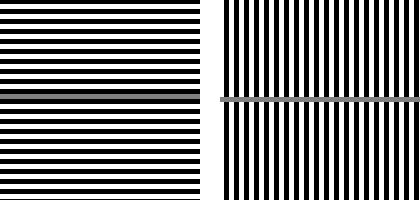

In [2]:
function show_together(x,y)
    @assert size(x,1) == size(y,1)
    w = Gray.([1. for i in 1:size(x,1), j in 1:20 ])
    [Gray.(x) w Gray.(y)]
end

function diagonal(n, B, γ; w = Inf, color = :black)
    m = ceil(Int, n/B)
    
    if w == Inf
        w = m
    end
    
    if γ == 0
        d = [ iseven(floor(Int, x/m)) ? 0. : 1. for x in 1:n, y in 1:n ]
        iseven(B) ? nothing : B = B-1
        k = ceil(Int, m * (B/2))
        if color == :black
            isodd(k) ? k = k+m : nothing
        else
            isodd(k) ? nothing : k = k-m
        end
        d[ k:(w-1+ k), :] = ones(w,n)*0.5
    else
        d = [ iseven(floor(Int, (x/tan(γ)+y)/(1+1/tan(γ))/m)) ? 1. : 0. for x in 1:n, y in 1:n ]
        h = floor(Int,w/2)
        d[ ceil(Int,n/2)-h:ceil(Int,n/2)+h, : ] = ones(2h+1, n)*0.5
    end
    d
end


diag1 = Gray.(diagonal( 200, 40, 0, color = :white))
diag2 = Gray.(diagonal( 200, 40, π/2))
show_together(diag1, diag2)

In [4]:
diag3 = Gray.(diagonal( 200, 40, atan(1/2)))
diag4 = Gray.(diagonal( 200, 40, atan(2)))
show_together(diag3, diag4)
typeof(diag3)

Array{Gray{Float64},2}

# Test of the 4 algorithms

## Straight lines

 10.430485 seconds (21.83 M allocations: 1.084 GiB, 7.15% gc time)


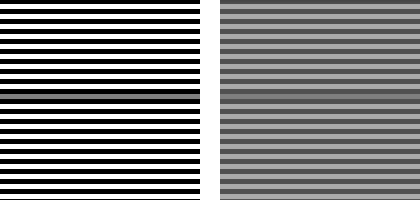

In [5]:
@time diag1_wc_2d = wc(diag1, 10, 2, 0.5, algo_type = :planar)[1]
show_together(diag1, diag1_wc_2d)

  1.474062 seconds (2.15 M allocations: 575.602 MiB, 6.12% gc time)


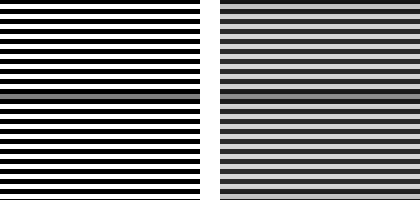

In [43]:
@time diag1_lhe_2d = lhe(diag1, 10, 5, 0.5, algo_type = :planar)[1]
show_together(diag1, diag1_lhe_2d)

 19.552311 seconds (17.40 M allocations: 13.082 GiB, 31.57% gc time)


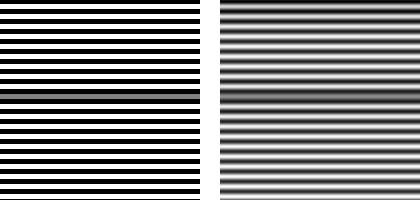

In [44]:
@time diag1_wc_3d = wc(diag1, 10, 5, 0.5, algo_type = :cortical)[1]
show_together(diag1, diag1_wc_3d)

 40.423159 seconds (25.82 M allocations: 24.122 GiB, 30.97% gc time)


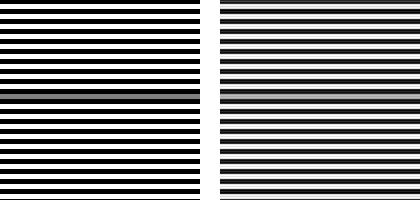

In [45]:
@time diag1_lhe_3d = lhe(diag1, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
show_together(diag1, diag1_lhe_3d)

## Diagonal lines

  0.052200 seconds (2.84 k allocations: 72.029 MiB, 17.15% gc time)


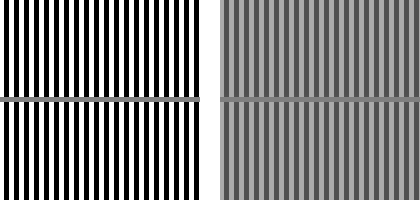

In [46]:
@time diag2_wc_2d = wc(diag2, 10, 2, 0.5, algo_type = :planar)[1]
show_together(diag2, diag2_wc_2d)

  2.016847 seconds (2.16 M allocations: 575.674 MiB, 5.69% gc time)


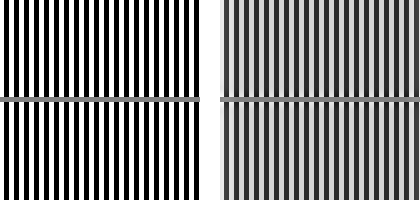

In [6]:
@time diag2_lhe_2d = lhe(diag2, 10, 5, 0.5, algo_type = :planar)[1]
show_together(diag2, diag2_lhe_2d)

 22.272918 seconds (24.05 M allocations: 17.130 GiB, 34.94% gc time)


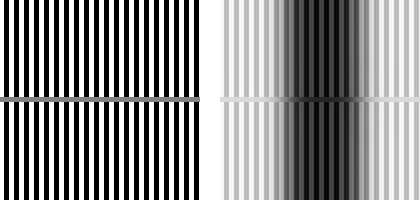

In [48]:
@time diag2_wc_3d = wc(diag2, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
show_together(diag2, diag2_wc_3d)

 96.154499 seconds (24.06 M allocations: 56.607 GiB, 32.39% gc time)


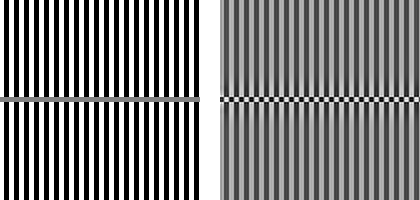

In [49]:
@time diag2_lhe_3d = lhe(diag2, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
show_together(diag2, diag2_lhe_3d)

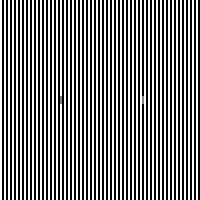

In [65]:
img = Gray.(load("/home/alexander/Desktop/JNP_italians/1_algorithm/illusions/white.png"))

 49.057966 seconds (24.88 M allocations: 26.582 GiB, 32.44% gc time)


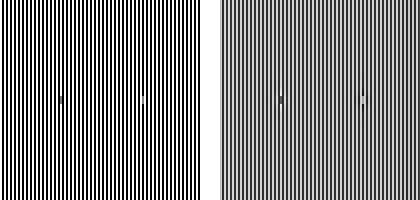

In [67]:
@time img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
show_together(img, img_lhe_3d)

## White

In [29]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/white"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["white0.01.png","white0.03.png","white0.05.png","white0.07.png","white0.09.png","white0.12.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    ## LHE cortical
    #img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    ## LHE planar
    #img_lhe_3d = lhe(img, 10, 5, 0.5, algo_type = :planar)[1]
    ## WC planar
    #img_lhe_3d = wc(img, 10, 2, 0.5, algo_type = :planar)[1]
    ## WC cortical
    img_lhe_3d = wc(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end


#save("/home/alexander/Desktop/JNP_italians/3_Results/img.jld", "data", img_lhe_3d)

white0.01.png
white0.03.png
white0.05.png
white0.07.png
white0.09.png
white0.12.png


## Chevreul

In [33]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/Chevreul"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["chevreul0.01.png","chevreul0.03.png","chevreul0.05.png","chevreul0.07.png","chevreul0.09.png","chevreul0.12.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    ## LHE cortical
    #img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    ## LHE planar
    #img_lhe_3d = lhe(img, 10, 5, 0.5, algo_type = :planar)[1]
    ## WC planar
    #img_lhe_3d = wc(img, 10, 2, 0.5, algo_type = :planar)[1]
    ## WC cortical
    img_lhe_3d = wc(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end


chevreul0.01.png
chevreul0.03.png
chevreul0.05.png
chevreul0.07.png
chevreul0.09.png
chevreul0.12.png


## Chevreul cancelation

In [42]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/ChevreulCan"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["chevreulCan0.01.png","chevreulCan0.03.png","chevreulCan0.05.png","chevreulCan0.07.png","chevreulCan0.09.png","chevreulCan0.12.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    ## LHE cortical
    #img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    ## LHE planar
    #img_lhe_3d = lhe(img, 10, 5, 0.5, algo_type = :planar)[1]
    ## WC planar
    #img_lhe_3d = wc(img, 10, 2, 0.5, algo_type = :planar)[1]
    ## WC cortical
    img_lhe_3d = wc(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end


chevreulCan0.01.png
chevreulCan0.03.png
chevreulCan0.05.png
chevreulCan0.07.png
chevreulCan0.09.png
chevreulCan0.12.png


## Brightness contrast

In [36]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/brightness"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["brightness0.01.png","brightness0.03.png","brightness0.05.png","brightness0.07.png","brightness0.09.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    ## LHE cortical
    #img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    ## LHE planar
    #img_lhe_3d = lhe(img, 10, 5, 0.5, algo_type = :planar)[1]
    ## WC planar
    #img_lhe_3d = wc(img, 10, 2, 0.5, algo_type = :planar)[1]
    ## WC cortical
    img_lhe_3d = wc(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end

brightness0.01.png
brightness0.03.png
brightness0.05.png
brightness0.07.png
brightness0.09.png


## Todorovic

In [38]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/todorovic"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["todorovic0.01.png","todorovic0.03.png","todorovic0.05.png","todorovic0.07.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    ## LHE cortical
    #img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    ## LHE planar
    #img_lhe_3d = lhe(img, 10, 5, 0.5, algo_type = :planar)[1]
    ### WC planar
    #img_lhe_3d = wc(img, 10, 2, 0.5, algo_type = :planar)[1]
    ## WC cortical
    img_lhe_3d = wc(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end

todorovic0.01.png
todorovic0.03.png
todorovic0.05.png
todorovic0.07.png


## Checkerboard

In [40]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/checkerboard"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["checkerboard0.01.png","checkerboard0.03.png","checkerboard0.05.png","checkerboard0.07.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    ## LHE cortical
    #img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    ## LHE planar
    #img_lhe_3d = lhe(img, 10, 5, 0.5, algo_type = :planar)[1]
    ## WC planar
    #img_lhe_3d = wc(img, 10, 2, 0.5, algo_type = :planar)[1]
    ## WC cortical
    img_lhe_3d = wc(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end

checkerboard0.01.png
checkerboard0.03.png
checkerboard0.05.png
checkerboard0.07.png


## Caffe wall

In [7]:
path = "/home/alexander/Desktop/JNP_italians/2_data/Illusions/caffeWall/"
savePath = "/home/alexander/Desktop/JNP_italians/3_Results/"
images = ["caffeWall10.png","caffeWall15.png","caffeWall20.png"]
for i = 1:size(images,1)
    
    println(images[i])
    img = Gray.(load(string(path,"/",images[i])))
    img_lhe_3d = lhe(img, 10, 5, 0.5, max_iter = 100, threshold = 0.01, m=200, bw = 4, algo_type = :cortical)[1]
    save(string(savePath,images[i],".jld"), "data", img_lhe_3d)
    
end

caffeWall10.png
caffeWall15.png
caffeWall20.png


In [ ]:
images = ["grating0.01.png","grating0.03.png","grating0.05.png","grating0.07.png","grating0.09.png","grating0.12.png","grating0.15.png"]
images = [""]